# The Sparks Foundation
# Data Science & Business Analytics Tasks - June 2021

# Task 2 - Prediction using Unsupervised ML

### Task: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

##### Submitted by: Ishpreet Singh

**Importing all the libraries required in this notebook**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

**Loading the iris dataset and reading the top 5 entries**

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**More details from the dataset**

In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Checking for null values**

In [5]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

**Plotting the correlation HeatMap**

In [6]:
correlation = df.corr()
correlation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

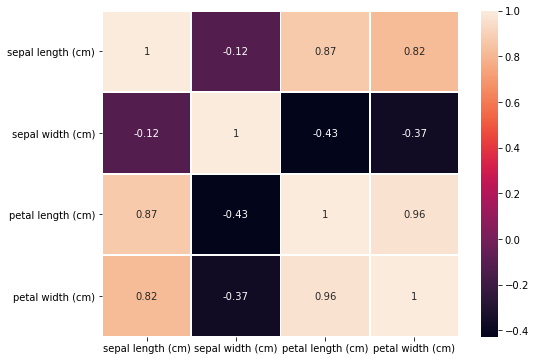

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot = True ,linewidth = 0.8)

**Finding the optimum number of clusters for k-means classification using Elbow Method**

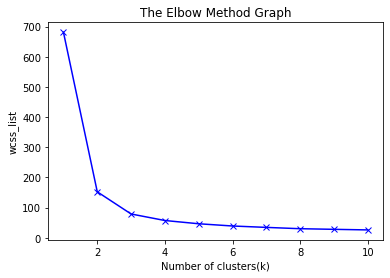

In [9]:
X = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans

wcss_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++' , random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11),wcss_list, 'bx-')
plt.title("The Elbow Method Graph")
plt.xlabel("Number of clusters(k)")
plt.ylabel("wcss_list")
plt.show()

The optimum clusters is where the elbow occurs.  
From this we choose the number of clusters as **3**

**Training kmeans model on dataset**

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++' , random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

**Applying kmeans to the dataset / Creating the kmeans classifier**

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

**Visualising the clusters**

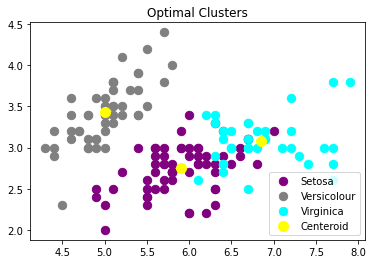

In [17]:
plt.scatter(X[y_pred == 0 ,0] , X[y_pred == 0 ,1] , s=70 , c = 'purple' , label = 'Setosa')
plt.scatter(X[y_pred == 1 ,0] , X[y_pred == 1 ,1] , s=70 , c = 'grey' , label = 'Versicolour')
plt.scatter(X[y_pred == 2 ,0] , X[y_pred == 2 ,1] , s=70 , c = 'cyan' , label = 'Virginica')

plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s=100 , c = 'yellow' , label = 'Centeroid')
plt.title("Optimal Clusters")
plt.legend()
plt.show()